In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings

In [16]:
%matplotlib inline
#pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()
#gpd.plotting.plot_linestring_collection
sns.set()
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(../input/world_cup_results.csv')

In [3]:
data.head(40)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,
5,1930,16-Jul-30,14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,
6,1930,17-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,
7,1930,17-Jul-30,14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,
8,1930,18-Jul-30,14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,
9,1930,19-Jul-30,12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,


In [35]:
data_year=data.groupby(data['Year']).count()
data_year.head()

,Year,HomeGoals,AwayGoals
Year,,,
1930,34740,59,11
1934,32878,48,22
1938,34884,61,23
1950,42900,69,19
1954,50804,109,31


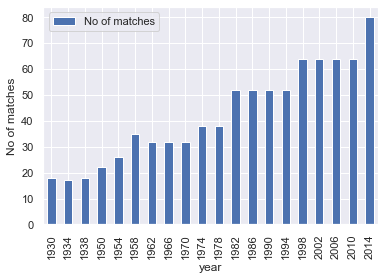

In [18]:
match_by_year=pd.DataFrame({'year':[x for x in data['Year'].unique()],'No of matches':[x for x in data_year['Date']]})
match_by_year.plot(x='year',y='No of matches', kind='bar')
plt.ylabel('No of matches')
plt.savefig('No of matches in a year.png')

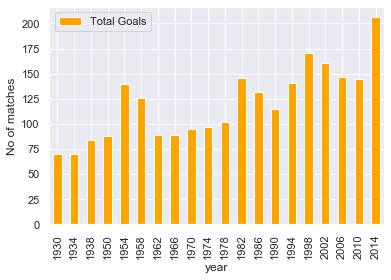

In [37]:
data_year=data.groupby(data['Year']).sum()
total_goal_per_year=pd.DataFrame({'year':[x for x in data['Year'].unique()],'Total Goals':[x+y for x,y in zip(data_year['HomeGoals'],data_year['AwayGoals'])]})
total_goal_per_year.plot(x='year',y='Total Goals',kind='bar',color='orange')
plt.ylabel('No of matches')
plt.savefig('No of goals in a year.png')

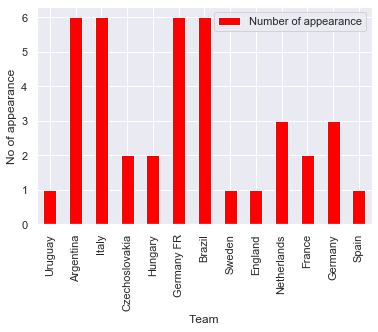

In [38]:
data_final=data.loc[data['Round']=='Final']
uniqueTeam=[]

for x,y in zip(data_final['HomeTeam'],data_final['AwayTeam']):
        uniqueTeam.append(x)
        uniqueTeam.append(y)
count=Counter(uniqueTeam)
Team_final=pd.DataFrame({'Team':[i for i in count], 'Number of appearance':[count[i] for i in count]})
Team_final.plot(x='Team',y='Number of appearance',kind='bar',color='red')
plt.ylabel('No of appearance')
plt.savefig('No of final appearance in a year.png')

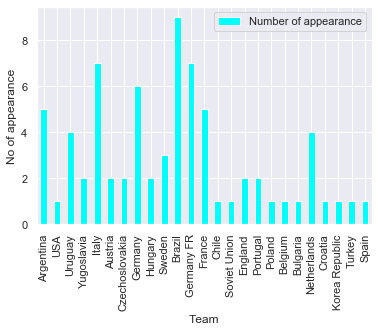

In [25]:
data_semi_final=data.loc[data['Round']=='Semi-finals']
uniqueTeam=[]

for x,y in zip(data_semi_final['HomeTeam'],data_semi_final['AwayTeam']):
        uniqueTeam.append(x)
        uniqueTeam.append(y)
count=Counter(uniqueTeam)
Team_semi_final=pd.DataFrame({'Team':[i for i in count], 'Number of appearance':[count[i] for i in count]})
Team_semi_final.plot(x='Team',y='Number of appearance',kind='bar',color='cyan')
plt.ylabel('No of appearance')
plt.savefig('No of s-final appearance in a year.png')

In [9]:
total_goal_semi=sum((data_semi_final['HomeGoals']+data_semi_final['AwayGoals']))
Average_goal_semi=total_goal_semi/len(data_semi_final['HomeGoals'])
print (total_goal_semi,Average_goal_semi)

131 3.638888888888889


In [26]:
data_quarter_final=data.loc[data['Round']=='Quarter-finals']
total_goal_quarter=sum((data_quarter_final['HomeGoals']+data_quarter_final['AwayGoals']))
Average_goal_quarter=total_goal_quarter/len(data_quarter_final['HomeGoals'])
print ('total_goal_quarter= {},Average_goal_quarter = {}'.format(total_goal_quarter,Average_goal_quarter))

total_goal_quarter= 180,Average_goal_quarter = 2.727272727272727


In [27]:
data_Final=data.loc[data['Round']=='Final']
total_goal_Final=sum((data_Final['HomeGoals']+data_Final['AwayGoals']))
Average_goal_Final=total_goal_Final/len(data_Final['HomeGoals'])
print ('total_goal_Final = {} , Average_goal_Final = {}' .format(total_goal_Final,Average_goal_Final))

total_goal_Final = 69 , Average_goal_Final = 3.45


In [28]:
unwanted=['Quarter-finals', 'Semi-Finals', 'Finals', 'Play-off for third place']
newdata=data[~(data['Round'].isin(['Quarter-finals', 'Semi-finals', 'Final', 'Play-off for third place','Match for third place']))]
total_matches_played_outside_quarter_finals=len(newdata['Date'])
print('total_matches_played_outside_quarter_finals = ',total_matches_played_outside_quarter_finals)

total_matches_played_outside_quarter_finals =  713


In [29]:
Original_data=data.copy()
data['Observation']=data['Observation'].str.split()
data.reset_index
for x in data.index:
    if len(data['Observation'].at[x])!=0:
        data['Observation'].at[x]=data['Observation'].at[x][0]

In [30]:
data


,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,[]
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,[]
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,[]
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,[]
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,[]
...,...,...,...,...,...,...,...,...,...,...,...
847,2014,5-Jul-14,17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands
848,2014,8-Jul-14,17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,[]
849,2014,9-Jul-14,17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina
850,2014,12-Jul-14,17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,[]


In [31]:
data['outcome']=np.where(data['HomeGoals']>data['AwayGoals'],'HomeTeam wins',np.where(data['HomeGoals']==data['AwayGoals'],'Draw','AwayTeam wins'))

In [32]:
data['winner']='a'
for i in data.index:
    if data['outcome'].at[i]=='HomeTeam wins':
        data['winner'].at[i]=data['HomeTeam'].at[i]
    elif data['outcome'].at[i]=='AwayTeam wins':
        data['winner'].at[i]=data['AwayTeam'].at[i]
    elif (data['outcome'].at[i]=='Draw') & (data['Round'].at[i] in ('Quarter-finals','Semi-finals','Final','Play-off for third place','Round of 16')):
        data['winner'].at[i]=data['Observation'].at[i]
    else:
        data['winner'].at[i]='Draw'

In [33]:
data

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,outcome,winner
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,[],HomeTeam wins,France
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,[],HomeTeam wins,USA
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,[],HomeTeam wins,Yugoslavia
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,[],HomeTeam wins,Romania
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,[],HomeTeam wins,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,5-Jul-14,17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands,Draw,Netherlands
848,2014,8-Jul-14,17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,[],AwayTeam wins,Germany
849,2014,9-Jul-14,17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina,Draw,Argentina
850,2014,12-Jul-14,17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,[],AwayTeam wins,Netherlands


In [34]:
Original_data['outcome']=data['outcome']
Original_data['winner']=data['winner']
Original_data['winner'].at[28]='Match replayed'

WINNER BY AWAY GOAL

In [31]:
data['Winner_away_goal']=np.where(data['HomeGoals']>data['AwayGoals'],data['HomeTeam'],data['AwayTeam'])
Original_data['Winner_away_goal']=data['Winner_away_goal']
Original_data

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,outcome,winner,Winner_away_goal
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,HomeTeam wins,France,France
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,HomeTeam wins,USA,USA
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,HomeTeam wins,Yugoslavia,Yugoslavia
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,HomeTeam wins,Romania,Romania
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,HomeTeam wins,Argentina,Argentina
5,1930,16-Jul-30,14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,HomeTeam wins,Chile,Chile
6,1930,17-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,HomeTeam wins,Yugoslavia,Yugoslavia
7,1930,17-Jul-30,14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,HomeTeam wins,USA,USA
8,1930,18-Jul-30,14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,HomeTeam wins,Uruguay,Uruguay
9,1930,19-Jul-30,12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,HomeTeam wins,Chile,Chile


In [ ]:
grid = sns.FacetGrid(Original_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()